In [1]:
%matplotlib inline

# system
import os
import importlib

# scipy
import numpy as np
from scipy import signal

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

# grandlib
import grand.dataio.root_trees as rt

import tools

plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')


colors = ['b','m','r']

Welcome to JupyROOT 6.26/10


In [26]:
root_file = '/sps/grand/data/gp13/GrandRoot/2024/03/GP13_20240314_041623_RUN125_MD_RAW_10s_ChanXYZ_20dB_11DUs_test_362_dat.root'

df   = rt.DataFile(root_file)
tadc = df.tadc

n_traces = tadc.get_number_of_entries()
traces   = np.zeros( (n_traces,3,1024) )

for i in range(n_traces):
    tadc.get_entry(i)
    traces[i] = np.array(tadc.trace_ch[0][1:])

fft  = np.fft.rfft(traces)
freq = np.fft.rfftfreq(1024,d=1/500)

In [ ]:
traces_filtered = tools.filter_traces( traces,freq_highpass=40,freqs_notch=[],bw_notch=[] )
fft_filtered    = np.fft.rfft(traces_filtered)

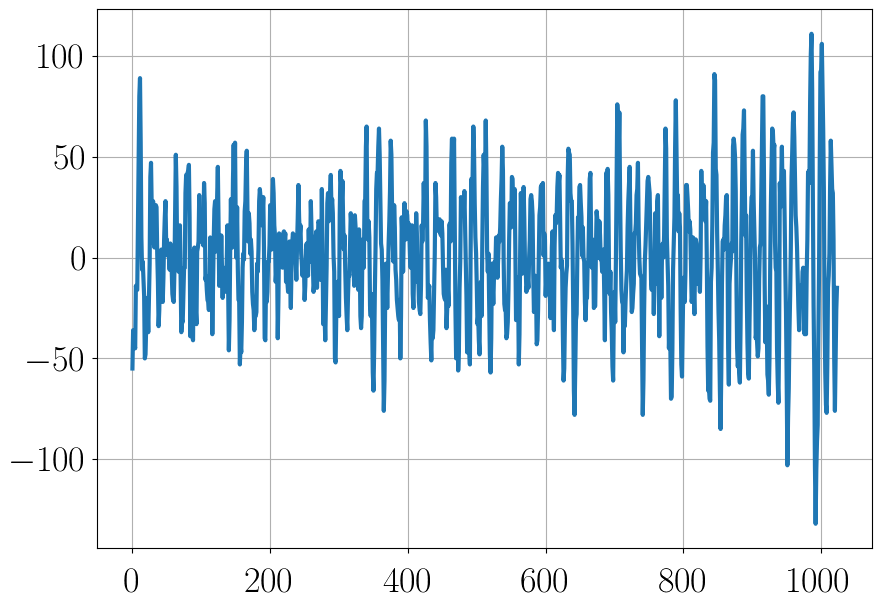

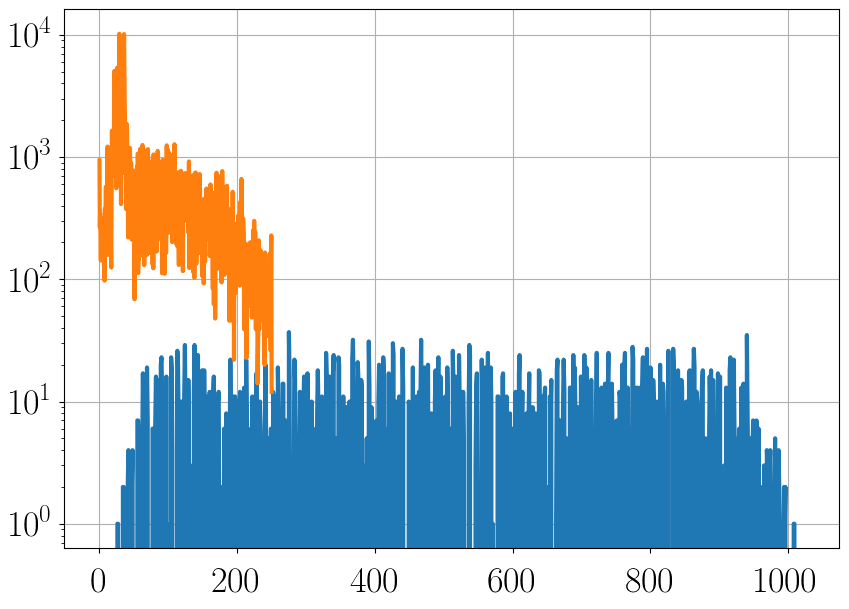

In [31]:
idx = 480

plt.plot(traces[idx][0])
plt.show()

plt.plot(traces_filtered[idx][0])
plt.show()

plt.plot(freq,np.abs(fft[idx][0]))
plt.yscale('log')
plt.show()

In [30]:
importlib.reload(tools)

tools.search_windows(traces[idx,0],samples_from_trace_edge=100)

([[314, 415]], [340])